<a href="https://colab.research.google.com/github/dwjang0902/ExampleNew/blob/master/TimeSeries_RNN_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

참조 : https://www.math.purdue.edu/~nwinovic/slides/Getting_Started_with_TensorFlow_I.pdf
http://androidkt.com/time-series/
https://medium.com/the-artificial-impostor/notes-understanding-tensorflow-part-2-f7e5ece849f5

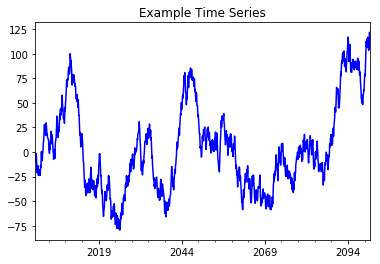

60
(60, 20, 1)
[[[ -7.77396977]
  [ -1.66609076]
  [ -9.31040299]
  [ -1.57162517]
  [ -5.11038611]
  [-13.5128238 ]
  [-20.92533546]
  [-19.56039151]
  [-17.96349118]
  [-13.8472564 ]
  [-15.98154273]
  [-23.72542178]
  [-18.97270354]
  [-19.48978508]
  [-18.76031013]
  [-18.80651256]
  [-18.09780341]
  [-23.86549473]
  [-22.52185806]
  [-13.49431277]]]
60
(60, 20, 1)
[[[ -1.66609076]
  [ -9.31040299]
  [ -1.57162517]
  [ -5.11038611]
  [-13.5128238 ]
  [-20.92533546]
  [-19.56039151]
  [-17.96349118]
  [-13.8472564 ]
  [-15.98154273]
  [-23.72542178]
  [-18.97270354]
  [-19.48978508]
  [-18.76031013]
  [-18.80651256]
  [-18.09780341]
  [-23.86549473]
  [-22.52185806]
  [-13.49431277]
  [-16.11080229]]]
0 \MSE  2114.1484
100 \MSE  64.31334
200 \MSE  39.558495
300 \MSE  30.558931
400 \MSE  27.145493
500 \MSE  24.25859
600 \MSE  21.38206
700 \MSE  18.79496
800 \MSE  17.066156
900 \MSE  17.553038
 Prediction = 
  [[[ 73.658455]
  [ 80.19753 ]
  [ 77.05778 ]
  [ 92.887794]
  [104.5036  ]


/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location " upper right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


<function matplotlib.pyplot.show>

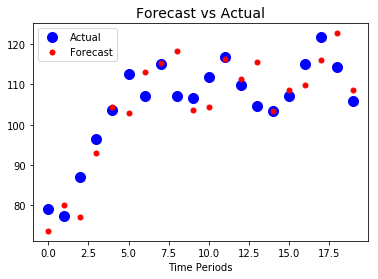

In [0]:
# Example #1 
# https://mapr.com/blog/deep-learning-tensorflow/

import sys
sys.version

import tensorflow as tf
import pandas as pd
import os
import matplotlib.pyplot as plt
import random
import numpy as np


random.seed(777)

rng = pd.date_range(start = '2000', periods = 1209, freq = "M" )
ts = pd.Series(np.random.uniform(-10, 10, size = len(rng)), rng).cumsum()
ts.plot(c = 'b', title = 'Example Time Series')
plt.show()
ts.head(10)

TS = np.array(ts)
num_periods = 20
f_horizon = 1


x_data = TS[:(len(TS)-(len(TS) % num_periods))]
x_batches = x_data.reshape(-1, num_periods, 1)

y_data = TS[1:(len(TS)-(len(TS) % num_periods))+f_horizon]
y_batches = y_data.reshape(-1, num_periods, 1)

print(len(x_batches))
print(x_batches.shape)
print(x_batches[0:1])

print(len(y_batches))
print(y_batches.shape)
print(y_batches[0:1])

# x_test
def test_data(series, forecast, num_periods) :
    test_x_setup = TS[-(num_periods+forecast):]
    testX = test_x_setup[:num_periods].reshape(-1,num_periods,1)
    testY = TS[-(num_periods):].reshape(-1,num_periods,1)
    return testX, testY
x_test, y_test = test_data(TS, f_horizon, num_periods)

tf.reset_default_graph()

#num_periods = 20
inputs = 1
hidden = 100
output = 1

x = tf.placeholder(tf.float32, [None, num_periods, inputs])
y = tf.placeholder(tf.float32, [None, num_periods, output])

cell = tf.contrib.rnn.BasicRNNCell(num_units = hidden, activation = tf.nn.relu)
outputs, _states = tf.nn.dynamic_rnn(cell, x, dtype = tf.float32)

learning_rate = 0.001

stacked_rnn_outputs = tf.reshape(outputs, [-1, hidden])
stacked_outputs = tf.layers.dense(stacked_rnn_outputs , output)
outputs = tf.reshape(stacked_outputs, [-1, num_periods, output])

loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()

epoches = 1000

with tf.Session() as sess :
    sess.run(init)
    for ep in range(epoches) :
        sess.run(training_op, feed_dict = { x : x_batches, y: y_batches})
        
        if ep % 100 == 0 :
            mse = loss.eval(feed_dict = { x : x_batches, y: y_batches})
            print(ep, "\MSE ", mse)

    y_pred = sess.run(outputs, feed_dict = {x:x_test})
    print(" Prediction = \n ", y_pred)
        

plt.title("Forecast vs Actual", fontsize = 14)
plt.plot( pd.Series(np.ravel(y_test)), "bo", markersize = 10, label ="Actual")

plt.plot(pd.Series(np.ravel(y_pred)), "r.", markersize = 10, label = "Forecast")
plt.legend(loc = " upper right")
plt.xlabel("Time Periods")
plt.show
        

INFO:tensorflow:Tensorflow version 1.13.1
(6400, 3, 1)
(6400, 3, 1)

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Use tf.cast instead.
0.13540362
[[[ 0.22210819]
  [ 0.8509172 ]
  [-0.22419909]]

 [[-0.38985527]
  [-0.6095638 ]
  [ 0.17868617]]]


'\ndef train_dataset():\n    dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train))\n    dataset = dataset.repeat()\n    dataset = dataset.shuffle(DATA_SEQ_LEN * 4 // SEQLEN)\n    dataset = dataset.batch(BATCHSIZE)\n    samples, labels = dataset.make_one_shot_iterator().get_next()\n    return samples, labels\n \n \ndef eval_dataset():\n    evaldataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test))\n    evaldataset = evaldataset.repeat(1)\n    evaldataset = evaldataset.batch(BATCHSIZE)\n \n    samples, labels = evaldataset.make_one_shot_iterator().get_next()\n    return samples, labels\n\n'

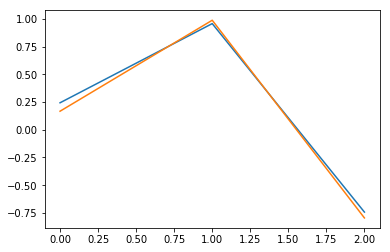

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Apr 26 14:30:05 2019
@author: Jang
"""
#http://androidkt.com/time-series/

import sklearn 
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt
 
import tensorflow as tf
from tensorflow.python.platform import tf_logging as logging
 
logging.set_verbosity(logging.INFO)
logging.log(logging.INFO, "Tensorflow version " + tf.__version__)
 
tf.reset_default_graph()
    
# Simulate Time Series Data 
def generate_time_series(datalen):
    freq1 = 0.2
    freq2 = 0.15
    noise = [np.random.random() * 0.1 for i in range(datalen)]
    x1 = np.sin(np.arange(0, datalen) * freq1) + noise
    x2 = np.sin(np.arange(0, datalen) * freq2) + noise
    x = x1 + x2
    return x.astype(np.float32)
 
 
DATA_SEQ_LEN = 24000
 
data = generate_time_series(DATA_SEQ_LEN)
#plt.plot(data[0:200])

SEQLEN =3  # unrolled sequence length
BATCHSIZE = 32
 
X = data
Y = np.roll(data, -1) # shift left
 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=.2, random_state=0)
 
X_train = np.reshape(X_train, [-1, SEQLEN,1])
Y_train = np.reshape(Y_train, [-1, SEQLEN,1])
X_test = np.reshape(X_test, [-1, SEQLEN,1])
Y_test = np.reshape(Y_test, [-1, SEQLEN,1])

print(X_train.shape)
print(Y_train.shape)

plt.plot(X_train[100])
plt.plot(Y_train[100])


# Model
hidden_size = 4
input_size = 1
output_size = 1

X = tf.placeholder(tf.float32, [None, SEQLEN,input_size]) # 3차원이 되어야 한다
Y = tf.placeholder(tf.float32, [None, SEQLEN,output_size])

cell = tf.contrib.rnn.BasicRNNCell(hidden_size)
#initial_state = rnn_cell.zero_state(None, dtype=tf.float32)
outputs, _states = tf.nn.dynamic_rnn(cell, X, dtype = tf.float32) # outputs = [batch_size, seq_len(max_time), hidden_size]; _states = [batch_size, hidden_size]

stacked_rnn_outputs = tf.reshape(outputs, [-1, hidden_size])
stacked_outputs = tf.layers.dense(stacked_rnn_outputs , output_size)
outputs = tf.reshape(stacked_outputs, [-1, SEQLEN, output_size])
predictions = outputs

#w = tf.Variable(tf.zeros([out_size, SEQLEN],dtype = tf.float32))
#b = tf.Variable(tf.zeros([out_size],dtype = tf.float32))
#predictions = tf.matmul(w,results) + b


loss = tf.losses.mean_squared_error(predictions = predictions, labels = Y,  weights=1.0)
loss_total = tf.reduce_mean(loss)  

optimizer = tf.train.AdamOptimizer(0.01)
train_opt = optimizer.minimize(loss)



init = tf.global_variables_initializer()

with tf.Session() as sess :
    sess.run(init)
    sess.run(train_opt, feed_dict = {X : X_train[100:102], Y : Y_train[100:102]})
    print(loss_total.eval(feed_dict = {X : X_train[100:102], Y : Y_train[100:102]}))     
    print(predictions.eval(feed_dict = {X : X_train[100:102]}))
   

"""
def train_dataset():
    dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train))
    dataset = dataset.repeat()
    dataset = dataset.shuffle(DATA_SEQ_LEN * 4 // SEQLEN)
    dataset = dataset.batch(BATCHSIZE)
    samples, labels = dataset.make_one_shot_iterator().get_next()
    return samples, labels
 
 
def eval_dataset():
    evaldataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test))
    evaldataset = evaldataset.repeat(1)
    evaldataset = evaldataset.batch(BATCHSIZE)
 
    samples, labels = evaldataset.make_one_shot_iterator().get_next()
    return samples, labels

"""